
# Løsningsforslag for eksempeloppgaver med programmering i Fysikk
Dette er et sett oppgaver som er ment å antyde aktuelle problemstillinger for eksamensoppgaver med programmering i Fysikk. Alle oppgavene er i flervalgsformat, da dette er formatet som vil bli brukt for slike oppgaver på eksamen (dvs. man vil **ikke** bli bedt om å skrive egen kode).

### Oppgave 1
En ball skytes uten luftmotstand fra et utgangspunkt som ligger over den horisontale bakken. Ballen skytes ut med startfart $v_0$ og startvinkel $\alpha$. Idet ballen treffer bakken, er posisjonon $y$, og $y>0$ hvis vi velger positiv retning nedover. Se figuren under.

<center><img src="figurer/oppgave_skrått_kast_bestem_utskytingsvinkel.png" alt="" style="width: 250px;"/></center>

Vi skal lage et Python-skript som først finner falltiden $t$, og deretter beregner den horisontale rekkevidden $x=v_0 \cos \alpha t$.

a) Bestem hva som må i kodecellen under, indikert med ?, for at funksjonen ```horisontal_rekkevidde(alfa,v0,y)``` skal returnere størrelsen $x$ på figuren over, for gitte verdier av $\alpha$, $v_0$ og $y$.

In [1]:
#Oppgave 1a)
from scipy.optimize import fsolve
import numpy as np

#Definerer verdi for g som en global variabel
g=9.81

def f(t,alfa,v0,y):
    """Funksjonen definerer likningen f(t)=0 for å finne tiden før legemet treffer bakken.
    Input:
    t: Tid, avhengig variabel [s]
    Parametre:
    alfa: Utskytingsvinkel med horisontalen [radianer]
    v0: Startfart [m/s]
    y: Posisjon når legemet treffer bakken [m] (NB: y < 0 pga. positiv retning oppover)
    """
    return 0.5*g*t**2-v0*np.sin(alfa)*t-y

def horisontal_rekkevidde(alfa,v0,y):
    """Funksjonen beregner den horisontale rekkevidden [m], for et gitt sett av input.
    Input: 
    alfa: Utskytingsvinkel med horisontalen [grader]
    v0: Startfart [m/s]
    y: Starthøyde over bakken [m]

    Output:
    Horisontal rekkevidde, dvs. horisontal avstand utgangspunkt-nedslagspunkt [m]
    """
    alfa=np.radians(alfa) #Konverterer vinkel til radianer
    t_start=1 #Startverdi/gjetning for t i fsolve
    #Beregner falltiden t. Vi leter etter løsninger for t, slik at alfa,v0,y er
    #parametre/gitte verdier til funksjonen f. Syntaksen (alfa,v0,y) angir at
    #f skal betraktes som en funksjon av t; ikke av alfa,v0,y.
    t=fsolve(f,t_start,(alfa,v0,y)) #Falltiden t
    return v0*np.cos(alfa)*t  #KODE MANGLER

#Definerer verdier for kastet
alfa=30 #Utgangsvinkel i grader
v0=7 #Startfart i m/s
y=0 #Starthøyde i m over bakkenivå. NB! y <= 0 pga. positiv retning oppover

print(horisontal_rekkevidde(alfa,v0,y))

[4.32571303]


A.  ```v0*np.cos(alfa)*t```<span>&#10003;</span>

B. ```v0*np.sin(alfa)*t```

C. ```v0*np.tan(alfa)*t```

D. ```v0*np.cos(np.radians(alfa))*t```

E. ```v0*np.sin(np.radians(alfa))*t```

b) Funksjonen ```horisontal_rekkevidde``` bruker en fast gjetning/startverdi ```t_start=1```, dvs. $t=1,0 \textrm{ s}$. Vi skal modifisere koden for å forbedre denne gjetningen:

1. For $\alpha>0$: ```t_start``` settes lik tiden for $y=0$ (lett å beregne).
2. For $\alpha=0$ og $y>0$: ```t_start``` settes lik tiden for vertikalt fall fra samme høyde (legemet slippes fra ro fra høyde  ```y```
3. For alle andre tilfeller: ```t_start=1```.

Bestem hva som skal stå på linja i kodecellen under, indikert med KODE MANGLER.

In [2]:
#Oppgave 1b)

from scipy.optimize import fsolve
import numpy as np

#Definerer verdi for g som en global variabel
g=9.81

def f(t,alfa,v0,y):
    """Funksjonen definerer likningen f(t)=0 for å finne tiden før legemet treffer bakken.
    Input:
    t: Tid, avhengig variabel [s]
    Parametre:
    alfa: Utskytingsvinkel med horisontalen [radianer]
    v0: Startfart [m/s]
    y: Posisjon når legemet treffer bakken [m] (NB: y < 0 pga. positiv retning oppover)
    """
    return -0.5*g*t**2+v0*np.sin(alfa)*t-y

def horisontal_rekkevidde(alfa,v0,y):
    """Funksjonen beregner den horisontale rekkevidden [m], for et gitt sett av input.
    Input: 
    alfa: Utskytingsvinkel med horisontalen [grader]
    v0: Startfart [m/s]
    y: Starthøyde over bakken [m] (NB: y <= 0 pga. positiv retning oppover)

    Output:
    Horisontal rekkevidde, dvs. horisontal avstand utgangspunkt-nedslagspunkt [m]
    """
    alfa=np.radians(alfa) #Konverterer vinkel til radianer

    #Beregner startverdi/gjetning for t avhengig av v0 og y
    if (alfa>0):
        t_start=2*v0*np.sin(alfa)/g #Startverdi for t lik falltid for y = 0
    elif (alfa==0 and y<0):
        t_start=(2*y/g)**0.5 #Startverdi for t lik falltid for vertikalt fall fra samme starthøyde
    else:
        t_start=1
    
    #Beregner falltiden t. Vi leter etter løsninger for t, slik at alfa,v0,y er
    #parametre/gitte verdier til funksjonen f. Syntaksen (alfa,v0,y) angir at
    #f skal betraktes som en funksjon av t; ikke av alfa,v0,y.
    t=fsolve(f,t_start,(alfa,v0,y)) #Falltiden t
    return v0*np.cos(alfa)*t  #KODE MANGLER

#Definerer verdier for kastet
alfa=30 #Utgangsvinkel i grader
v0=7 #Startfart i m/s
y=0 #Starthøyde i m over bakkenivå. NB! y <= 0 pga. positiv retning oppover

print(horisontal_rekkevidde(alfa,v0,y))

[4.32571303]


A. ```(2*y/g)**0.5```<span>&#10003;</span>

B. ```(y/g)**0.5```

C. ```2*y/g```

D. ```2*y**0.5/g```

E. ```y/g```

c) Vi skal nå modifisere koden for å bestemme den vinkelen $\alpha_{\text{max}}$ som gir den **maksimale** horisontale rekkevidden. Algoritmen:

1. Definer et NumPy-array ```vinkler``` med alle vinkler i intervallet $[0,90^{\circ}]$
2. Definer et tomt NumPy-array ```rekkevidde``` med samme størrelse som ```vinkler```
3. Bruk en for-løkke til å kalle funksjonen ```horisontal_rekkevidde``` for hver vinkel og lagre verdiene i ```rekkevidde``` 
4. Finn indeks for den maksimale verdien lagret i ```rekkevidde``` 
5. Hent ut vinkelen som gir maksimal rekkevidde fra ```vinkler```

Bestem hva som skal stå på linja i kodecellen under, indikert med KODE MANGLER.

In [4]:
#Oppgave 1c
import numpy as np
def alfa_maks(v0,y):
    vinkler=np.linspace(0,90,1000) #1
    rekkevidde=np.zeros_like(vinkler) #2
    i=0 #3
    for alfa in vinkler:
        rekkevidde[i]=horisontal_rekkevidde(alfa,v0,y) #KODE MANGLER
        i=i+1
    indeks=np.argmax(rekkevidde) #4
    alfa_maks=vinkler[indeks]  #5
    return alfa_maks

#Beregner maksimal rekkevidde for gitte verdier av v0 og y
v0=7
y=0
print(alfa_maks(v0,y))

44.95495495495495


c:\Users\knutb\anaconda3\lib\site-packages\scipy\optimize\minpack.py:175: RuntimeWarning: The number of calls to function has reached maxfev = 400.
  warnings.warn(msg, RuntimeWarning)


A. ```horisontal_rekkevidde(alfa,v0,y)```<span>&#10003;</span>

B. ```horisontal_rekkevidde(np.deg2rad(alfa),v0,y)```

C. ```horisontal_rekkevidde(alfa,(v0,y))```

D. ```horisontal_rekkevidde(alfa,v0,-y)```

E. ```horisontal_rekkevidde(alfa,-v0,-y)```


### Oppgave 2
En ball skytes uten luftmotstand mot en blink som har posisjon $(x,y)$ i forhold til utskytingspunktet, med $y>0$ (positiv retning nedover). Ballen skytes ut med startfart $v_0$ og startvinkel $\alpha$, som vist på figuren under.

<center><img src="figurer/oppgave_skrått_kast_bestem_utskytingsvinkel.png" alt="" style="width: 250px;"/></center>

a) For å finne utskytingsvinkelen $\alpha$ som gir treff i blinken for gitte verdier av $x$, $y$ og $v_0$, må vi løse en trigonomtrisk likning $f(\alpha)=0$. Bestem hva som må stå i linja indikert med KODE MANGLER i kodecellen under for at funksjonen $f(\alpha)$ definerer likninga $f(\alpha)=0$.

In [5]:
#Oppgave 2a
import numpy as np
def f(alfa,x,y,v0):
    g=9.81
    alfa=np.deg2rad(alfa)
    return y-0.5*g*x**2/(v0**2*(np.cos(alfa))**2)+x*np.tan(alfa) #KODE MANGLER

A. ```-0.5*g*x**2/(v0**2*(np.cos(alfa))**2) -x*np.tan(alfa)```

B. ```0.5*g*x**2/(v0**2*(np.cos(alfa))**2) -x*np.tan(alfa)```

C. ```y-0.5*g*x**2/(v0**2*(np.cos(alfa))**2)+x*np.tan(alfa)```<span>&#10003;</span>

D. ```y+0.5*g*x**2/(v0**2*(np.cos(alfa))**2) -x*np.tan(alfa)```

E. ```y+0.5*g*x**2/(v0**2*(np.cos(alfa))**2) -x*np.cos(alfa)```

b) For å løse likninga $f(\alpha)=0$ ved hjelp av ```fsolve```, må vi angi startverdier/gjetninger i nærheten av løsningen(e) vi skal finne. Det er derfor hensiktsmessig å bruke Matplotlib til å tegne grafen til $f(\alpha)$ for gitte verdier av  $x$, $y$ og $v_0$.

Bestem hva som må stå i linja indikert med ? i kodecellen under for at Matplotlib skal tegne grafen til $f(\alpha)$ for vinkler i intervallet $[0,90^{\circ}]$.

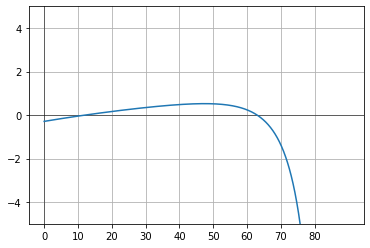

In [6]:
#Oppgave 2b
import numpy as np
import matplotlib.pyplot as plt

#Definerer verdier for x, y og v0
x=1.5
y=0.4
v0=4.0

#Definerer array med verdier for vinklene i intervallet [0,90]
vinkler=np.linspace(0,90,1000)

#Funksjonsverdiene som skal plottes er f(vinkler)
verdier=f(vinkler,x,y,v0)

#Definerer egenskapene til grafen som skal tegnes
plt.ylim(-5,5) #Nedre og øvre y-verdi
plt.xticks(np.arange(0,90,10)) #Definerer skala på x-aksen
plt.grid('major') #Tegner inn rutenett
plt.axhline(0, color='black', linewidth=.5) #Tegner inn horisontal x-akse
plt.axvline(0, color='black', linewidth=.5) #Tegner inn vertikal y-akse
plt.plot(vinkler,verdier) #Plotter f som funksjon av alfa
plt.show() #Tegn plott


A. ```f(vinkler,x,y,v0)```<span>&#10003;</span>

B. ```f(vinkler,x,y,v/3.6)``` 

C. ```f(np.radians(alfa),x,y,v0)``` 

D. ```f(np.radians(vinkler),x,y,v0)``` 

E. ```f(alfa,x,y,v0)``` 

c) Bestem hva som må stå i linja indikert med ? i kodecellen under for at ```fsolve``` skal løse likningen $f(\alpha)=0$, i nærheten av startverdien/gjetningen $\alpha_0$, og lagre løsningen i variabelen ```losning```.

In [7]:
#Oppgave 2c
from scipy.optimize import fsolve
import numpy as np

#Definerer verdier for x, y og v0
x=1.5
y=-0.4
v0=4.0
alfa0=10

losning=fsolve(f,alfa0,(x,y,v0))
print(losning)

[12.09521032]


A. ```fsolve(f,np.radians(alfa0),(x,y,v0))``` 

B. ```fsolve(f(alfa),np.radians(alfa0),(x,y,v0))``` 

C. ```fsolve(f(alfa),alfa0,(x,y,v0))``` 

D. ```fsolve(f,alfa0,(x,y,v0))```<span>&#10003;</span>

E. ```fsolve(f,alfa0,x,y,v0)```


# Oppgaver med integrasjon
## Oppgave 3
En bil kjører rettlinjet på horisontalt underlag, og påvirkes av luftmotstand med absoluttverdi $F_D=kv^2$ der $k$ er en positiv konstant, som virker motsatt av fartsretningen. 

a) Bestem effekten produsert av luftmotstanden på et tidspunkt der bilen har hastighet $v$.

A. $kv^2$

B. $kv^3$ <span>&#10003;</span>

C. $\frac{1}{2}kv^2$

D. $\frac{1}{2}kv^3$

E. $\frac{1}{3}kv^3$

b) Bilens fart som funksjon av tiden, $v(t)$, beregnes av en datalogger i bilen. Vi skal lage en funksjon som beregner det totale arbeidet $W$ utført på bilen fra $t=t_0$ til $t=t_1$ for en gitt $v(t)$, ved å bruke arbeid-energi-teoremet sammen med definisjonen av effekt og arbeid: $P=\frac{dW}{dt} \Rightarrow W=\int_{t_0}^{t_1} P(t) dt$.

Bestem hva som må stå i linja indikert med ? i kodecellen under for at funksjonen ```W(t0,t1,m)``` returnerer det totale arbeidet i kJ (kilojoule) utført på en bil med masse $m$ i tidsrommet $t_0 \leq t \leq t_1$.

In [8]:
#Oppgave 3b
import numpy as np
import scipy.integrate as integrate

def v(t):
    """Funksjonen beregner bilens fart v(t).
    Input: 
    t: tid [s]
    
    Output:
    bilens fart [m/s]
    """
    return 20*np.arctan(0.85*t)


def P(t):
    """Funksjonen beregner effekten produsert av luftmotstanden ved fart v(t).
    Input: 
    t: tid [s]
    
    Output: 
    effekt [W]
    """
    k=5.0 #Verdi for k [Ns^2/m^2]
    return k*v(t)**3

def W(t0,t1,m):
    """Funksjonen beregner det totale arbeidet utført på bilen fra t=t0 til t=t1.
    Input:
    t0: starttid [s]
    t1: sluttid [s]
    m: bilens masse [kg]

    Output: Totalt arbeid utført på bilen i tidsrommet [kJ]
    """
    W_f=integrate.quad(P,t0,t1)[0] #Arbeid utført av luftmotstanden
    W_k=0.5*m*(v(t1)**2-v(t0)**2) #Arbeid for å endre kinetisk energi
    return (W_f+W_k)/1000 #Totalt arbeid utført på bilen [kJ]

A. ```W_f+W_k``` 

B. ```(W_f+W_k)/1000```<span>&#10003;</span>

C. ```(W_f+W_k)*1000``` 

D. ```W_f/1000```

E. ```W_f*1000```

# Oppgaver med løsning av differensiallikninger
## Oppgave 4
Et legeme med masse $m$ som er helt nedsenket i vann, slippes fra ro i en viss dybde, og synker nedover. Legemet påvirkes av to krefter: tyngden $G=mg$ (antas konstant), og en væskemotstand proporsjonal med farten; $F_D=kv$, der $k$ er en positiv konstant.

a) Hva blir legemets terminalfart (maksimale fart) $v_{\text{max}}$?

A. $v_{\text{max}}=\frac{mg}{k}$<span>&#10003;</span>

B. $v_{\text{max}}=\frac{2mg}{k}$

C. $v_{\text{max}}=\frac{mg}{2k}$

D. $v_{\text{max}}=\sqrt{\frac{mg}{k}}$

E. $v_{\text{max}}=\sqrt{\frac{mg}{2k}}$

b) Vi skal laget et Python-program som bruker Eulers metode med tidssteg $dt$ til å løse den 1. ordens differensiallikningen for legemets fart $v(t)$. Programmet skal bestemme $v(t)$ fra $t=0$ til en sluttid $t=t_1$, for gitte verdier av $m$, $g$ og $k$. Programmet skal generere to lister: én liste ```t_liste``` med t-verdier fra $t_0$ til $t_1$, og én liste ```v_liste``` som inneholder fartsverdiene $v(t)$.

Bestem hva som må stå i linja indikert med ? i kodecellen under for at funksjonen ```v(t0,t1,dt,v0)``` skal returnere  ```t_liste```, ```v_liste```. for gitte verdier av start-/sluttid $t_0$, $t_1$, tidssteget $dt$ og startfart $v_0$. 

In [9]:
#Oppgave 4b
import numpy as np


def dvdt(v):
    """Funksjonen beregner akselerasjonen a=dv/dt for legemet som funksjon av farten v.
    Input:
    v: fart [m/s]

    Output: Legemets akselerasjon [m/s^2]
    """
    #Angir parametre
    g=9.81 #Tyngdeakselerasjonen
    m=1.0E-3 #Legemets masse
    k=3.0E-3 #Verdien av konstanten k
    return g-(k/m)*v #Returnerer akselerasjonen a(v)

def v(t0,t1,dt=0.1,v0=0):
    """Funksjonen beregner v(t) via Eulers metode fra t=t0 til t=t1 med tidssteg dt.
    Input:
    t0: starttid [s]
    t1: sluttid [s]
    dt (0.1 s med mindre annet er spesifisert): tidssteg [s]
    v0 (0 med mindre annet er spesifisert): startfart [m/s]

    Output:
    (t_liste, v_liste): tuppel med liste over hhv. t- og v-verdier
    """
    
    #Initialiserer t og v
    t=t0
    v=v0

    #Initialiserer lister
    t_liste=[t0]
    v_liste=[v0]
    
    #Løkke for Eulers metdoe
    while(t<t1):
        v=v+dvdt(v)*dt
        t=t+dt
        v_liste.append(v)
        t_liste.append(t)
    return t_liste,v_liste


A. ```v=v+dvdt(v/3.6)*dt``` 

B. ```v=dvdt(v)*dt``` 

C. ```v=v+dvdt(v)*dt```<span>&#10003;</span>

D. ```v=dvdt(v/3.6)*dt``` 

E. ```v=dvdt*dt```

c) Kodecellen under viser resultatet når Matplotlib genererer et plott for $v(t)$ basert på dataene i den forrige kodecellen.

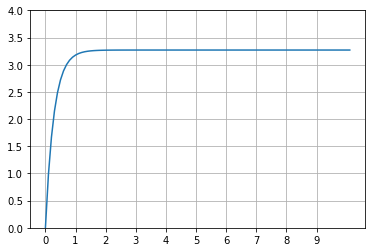

In [10]:
import matplotlib.pyplot as plt

#Genererer lister for t og v mellom t=t0 og t=t1
t0=0
t1=10
t_liste,v_liste=v(t0,t1)

#Plotter v(t)
plt.ylim(0,4) #Nedre og øvre y-verdi
plt.xticks(np.arange(t0,t1,1)) #Definerer skala på tidsaksen
plt.grid('major') #Tegner inn rutenett
plt.plot(t_liste,v_liste) #Plotter v(t)
plt.show() #Tegner graf

Basert på grafen over, hvilken påstand om bevegelsen til legemet for $t_0 \leq t \leq t_1$ er riktig?

A. Legemets akselerasjon er økende

B. Legemets akselerasjon er avtakende<span>&#10003;</span>

C. Legemets akselerasjon er tilnærmet konstant

D. Legemets fart er tilnærmet konstant

E. Legemet blir etterhvert liggende i ro

